1. Lynxdata (2 points)
Lynxes seem to be related to a rather interesting phenomena that we will be examining more later. For now, download a Canadian dataset that describes the number of lynxes by year (the years are in the column 'year' and lynx count in the column 'lynx'). Find out the number of lynxes in the leap years of the 20th-century (1904,  1908,  1912,  1916,  1920,  1924,  1928 and 1932). In other words, write a program that prints out the number of lynxes for each of these years.

In [1]:
import numpy as np
lynx = np.genfromtxt("data/lynx.csv", names = True, delimiter = ",")

In [2]:
lynx_leap = lynx["year"] % 4 == 0 
lynx_1900 = lynx["year"] >= 1900
lynx_1900leap = lynx_leap & lynx_1900
year_1900leap = lynx["year"][lynx_1900leap]
count_1900leap = lynx["lynxcount"][lynx_1900leap]
[(f"The year of {year_1900leap[k]} has {count_1900leap[k]} lynxes") for k in range(len(year_1900leap))]

['The year of 1900.0 has 387.0 lynxes',
 'The year of 1904.0 has 6991.0 lynxes',
 'The year of 1908.0 has 345.0 lynxes',
 'The year of 1912.0 has 2713.0 lynxes',
 'The year of 1916.0 has 3790.0 lynxes',
 'The year of 1920.0 has 108.0 lynxes',
 'The year of 1924.0 has 2432.0 lynxes',
 'The year of 1928.0 has 529.0 lynxes',
 'The year of 1932.0 has 1590.0 lynxes']

2. Lynxplot (2 points)
Make a line plot, with the year on the x-axis and the number of lynxes on the y-axis.

Text(0.5, 1.0, 'The number of lynxes in the leap years after 1900')

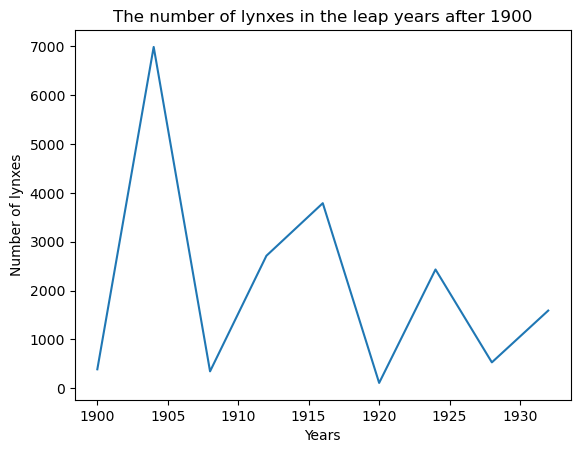

In [3]:
import matplotlib.pyplot as plt
plt.plot(year_1900leap, count_1900leap)
plt.xlabel("Years")
plt.ylabel("Number of lynxes")
plt.title("The number of lynxes in the leap years after 1900")

3. Z-normalization (2 points)
Write a function that z-normalizes a list of numbers. This means that our values are standardized so that the mean of our list is approximately 0 and the standard deviation is approximately 1.  You can do this by subtracting the mean from each value and then diving each result by the sample standard deviation.

You can calculate the mean and standard deviations however you see fit (for example, by using functions from the previous exercise sets or with numpy's pre-existing functions), but try to do the actual z-normalization (substraction by mean and division by sample standard deviation) without loops.

Chk. you can find an example illustration here.

In [4]:
# z-normalization function
def znorm(mylist):
    mylist = np.array(mylist)
    mylist_average = np.average(mylist)
    mylist_std = np.std(mylist)
    mylist_znorm = (mylist - mylist_average)/mylist_std
    return(mylist_znorm)
test = znorm([1,2,3,4,5,6,7])
test_average = np.average(test)
test_std = np.std(test)
print(test_average, test_std)

0.0 1.0


4. Temperature in Helsinki (3 points)
Read a dataset describing the temperatures (in Celsius) of a few different cities in Finland in different seasons.

a) Plot the temperatures of Helsinki summers. The x-axis should have the year and  y-axis the temperature.

b) Calculate the average temperature for each season in Helsinki (i.e. print out the mean average of the seasonal temperatures from 1830-2020, and do this separately for summers, falls, springs, and winters).

c ) Calculate the average temperature of each year in Helsinki (by averaging the spring, summer, fall and winter temperatures of each year).

Hint: You can open the file for example with numpy's genfromtxt function (e.g. data = np.genfromtxt("temperature_stats.csv", names = True, delimiter = ",")). The column names can be read from either the actual file or by saying print(data.dtype).   

In [5]:
temp = np.genfromtxt("data/temperature_stats.csv", names=True, delimiter=",")
temp_year = temp["Year"]
temp_year = temp_year.astype(int)

(1830.0, 2020.0)

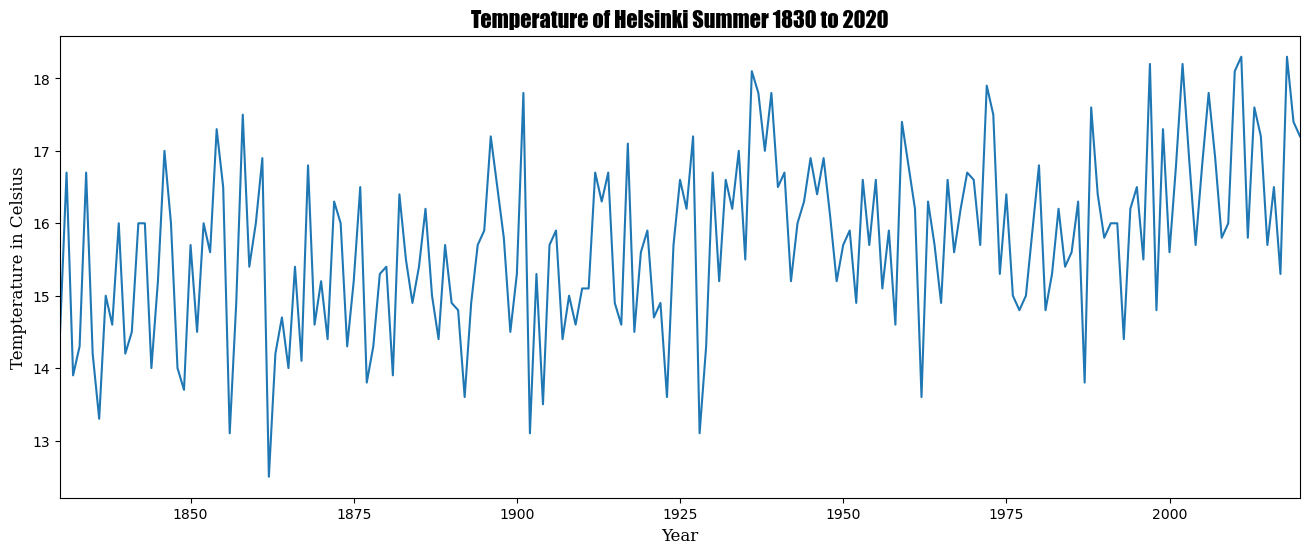

In [6]:
font1 = {'family':'fantasy','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':12}
font3 = {'family':'cursive','color':'black','size':20}

plt.figure(figsize=(16,6))
plt.plot(temp["Year"],temp['HelsinkiSummer'])
plt.xlabel("Year", fontdict=font2)
plt.ylabel("Tempterature in Celsius", fontdict=font2)
plt.title("Temperature of Helsinki Summer 1830 to 2020", fontdict=font1)
plt.xlim(1830,2020)

In [7]:
temp_spring = np.around(np.average(temp["HelsinkiSpring"]),3)
temp_summer = np.around(np.average(temp["HelsinkiSummer"]),3)
temp_fall = np.around(np.average(temp["HelsinkiFall"]),3)
temp_winter = np.around(np.average(temp["HelsinkiWinter"]),3)
print(f"The average temperature for spring is {temp_spring} Celsius \n The average temperature for summer is {temp_summer} Celsius \n The average temperature for fall is {temp_fall} Celsius \n The average temperature for winter is {temp_winter} Celsius")


The average temperature for spring is 2.796 Celsius 
 The average temperature for summer is 15.721 Celsius 
 The average temperature for fall is 6.012 Celsius 
 The average temperature for winter is -4.758 Celsius


In [8]:
temp_yearmean = (
    temp["HelsinkiSpring"]+
    temp["HelsinkiSummer"]+
    temp["HelsinkiFall"]+
    temp["HelsinkiWinter"])/4
 
temp_yearmean = np.around(temp_yearmean, 2)
 
[(f"The year of {temp_year[k]} has an average temperature of {temp_yearmean[k]} Celsius") for k in range(len(temp_year))]

['The year of 1830 has an average temperature of 3.55 Celsius',
 'The year of 1831 has an average temperature of 4.22 Celsius',
 'The year of 1832 has an average temperature of 4.68 Celsius',
 'The year of 1833 has an average temperature of 4.88 Celsius',
 'The year of 1834 has an average temperature of 4.55 Celsius',
 'The year of 1835 has an average temperature of 4.57 Celsius',
 'The year of 1836 has an average temperature of 3.68 Celsius',
 'The year of 1837 has an average temperature of 4.35 Celsius',
 'The year of 1838 has an average temperature of 2.57 Celsius',
 'The year of 1839 has an average temperature of 4.35 Celsius',
 'The year of 1840 has an average temperature of 3.02 Celsius',
 'The year of 1841 has an average temperature of 3.75 Celsius',
 'The year of 1842 has an average temperature of 5.03 Celsius',
 'The year of 1843 has an average temperature of 4.7 Celsius',
 'The year of 1844 has an average temperature of 3.18 Celsius',
 'The year of 1845 has an average tempera

5.  Closer look at Helsinki temperatures (2 points)
Find the years when the Helsinki spring temperature is above the average spring temperature of the whole time-period (1830-2020). Plot a graph showing the spring temperature of each years as a line plot. Highlight (with red dots for example) the years when the spring temperature is higher than average of the time period. The result should look something like this:

In [9]:
temp_springmean = np.mean(temp["HelsinkiSpring"])
abovemean = temp["HelsinkiSpring"] > temp_springmean
temp_abovemean = temp["HelsinkiSpring"][abovemean]
year_abovemean = temp["Year"][abovemean]


Text(1990, 2.2, '↑ \n Average temperature of spring')

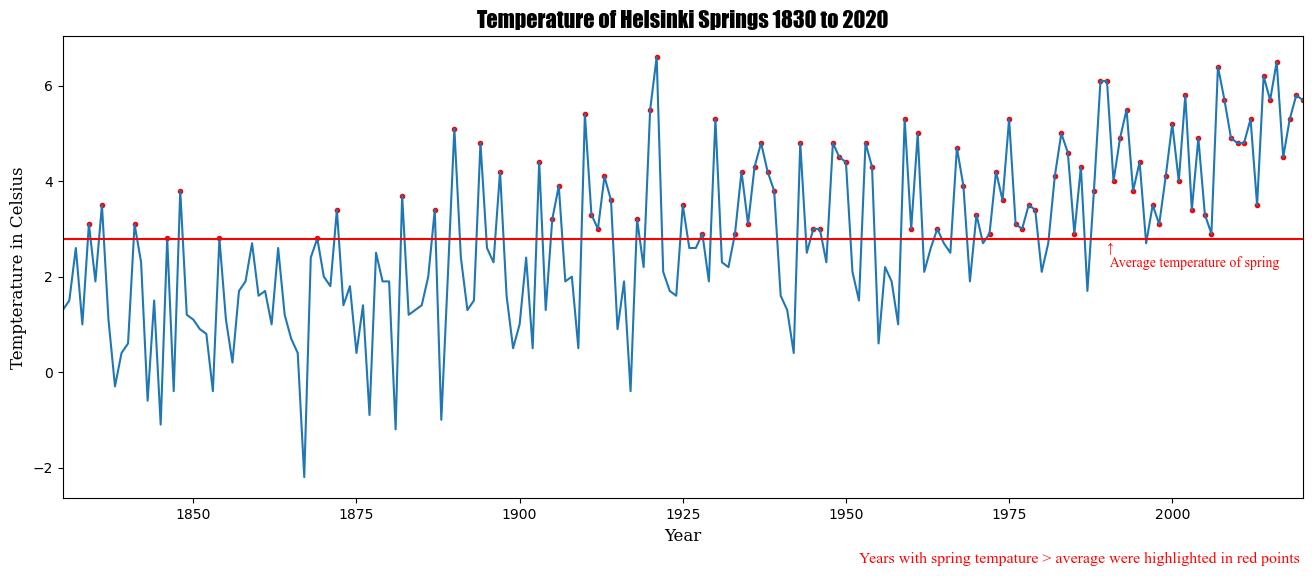

In [10]:
plt.figure(figsize=(16,6))
plt.plot(temp_year, temp["HelsinkiSpring"])
plt.xlim(1830,2020)
plt.scatter(year_abovemean, temp_abovemean, marker = ".", color = "red")
plt.xlabel("Year", fontdict=font2)
plt.ylabel("Tempterature in Celsius", fontdict=font2)
plt.title("Temperature of Helsinki Springs 1830 to 2020", fontdict=font1)
plt.text(1952, -4, 
          "Years with spring tempature > average were highlighted in red points", 
         fontsize = 11.5, fontname = "Times New Roman", color = "red")
plt.axhline(temp_springmean, color='r')
plt.text(1990, 2.2, 
          "↑ \n Average temperature of spring", 
         fontsize = 10, fontname = "Times New Roman", color = "red")

6. Still more temperatures (3 points)
Calculate and print out the average summer temperature of each decade (in Helsinki).

Hint: Use boolean indexing. There are many ways to solve this, but it's probably a good idea to first create a variable that tells to which decade each line in the data belongs to (extra hint: 1927//10==192).  You could loop through each decade (np.unique(decades) would produce an array with each decade as a single element if the decades variable tells which decade each line of data belongs to) and select the lines from the data that belong to that decade.

In [11]:
temp_year = temp_year.astype(str)
temp_decade = [temp_year[k][0:3] for k in range(len(temp_year))]
temp_decade = np.array(temp_decade)

temp_decade_unique = np.unique(temp_decade)
summer_mean_list = list()
for k in range(len(temp_decade_unique)):
   temp_same_decade = temp_decade == temp_decade_unique[k]
   summer_mean = np.mean(temp["HelsinkiSummer"][temp_same_decade])
   summer_mean = np.around(summer_mean, 2)
   summer_mean_list.append(summer_mean)
[f"The average summer temperature for the years of {temp_decade_unique[k]}0~{temp_decade_unique[k]}9 was {summer_mean_list[k]}" for k in range(len(summer_mean_list))]



['The average summer temperature for the years of 1830~1839 was 14.92',
 'The average summer temperature for the years of 1840~1849 was 15.06',
 'The average summer temperature for the years of 1850~1859 was 15.65',
 'The average summer temperature for the years of 1860~1869 was 14.92',
 'The average summer temperature for the years of 1870~1879 was 15.13',
 'The average summer temperature for the years of 1880~1889 was 15.28',
 'The average summer temperature for the years of 1890~1899 was 15.38',
 'The average summer temperature for the years of 1900~1909 was 15.06',
 'The average summer temperature for the years of 1910~1919 was 15.66',
 'The average summer temperature for the years of 1920~1929 was 15.22',
 'The average summer temperature for the years of 1930~1939 was 16.79',
 'The average summer temperature for the years of 1940~1949 was 16.22',
 'The average summer temperature for the years of 1950~1959 was 15.84',
 'The average summer temperature for the years of 1960~1969 was 

7. Sunspots... (3 points)
There have been many claims about sunspots and their effect on various phenomena. We have an extensive time series of the number of sunspots each year, but unfortunately, the data is in a rather hard-to-read format.

To examine the data more closely, write a module called sunspots and make a function called read_sunspots. The read_sunspots function should read the given datafile into a form where the years are in one column and the sunspots are in another column. Finally plot (plt.plot) the results as a line plot with the years on the x-axis and number of sunspots on the y-axis. 

Hint: You'll likely have to read the file 'manually' with the open function and then read the whole file into one big string with the read function. Note that the file always has the year first and then the number of sunspots in the year, and the values are separated by white space.

In [35]:
# a function to read the yearly.txt file and return two lists of years and sunspots as well as a plot of data
def read_sunspots(filename):
    values_list = []
    with open("data/yearly.txt", 'r') as file:
        for line in file:
            values = line.split()
            values_list.append(values)

    year_list = []
    count_list = []

    for k in range(len(values_list)):
        for i in range(len(values_list[k])):
            if i % 2 == 0:
                year = int(values_list[k][i])
                year_list.append(year)
            else:
                count = float(values_list[k][i])
                count_list.append(count)
    year_list = np.array(year_list)
    count_list = np.array(count_list)

    order = np.argsort(year_list)

    year_list_order = year_list[order]
    count_list_order = count_list[order]

    plt.figure(figsize=(16, 6))
    plt.plot(year_list_order, count_list_order)
    plt.xlabel("Year", fontdict=font2)
    plt.ylabel("Number of sunspots", fontdict=font2)
    plt.title(f"Number of sunspots from {min(year_list_order)} to {max(year_list_order)}", fontdict=font1)
    plt.xlim(min(year_list_order), max(year_list_order))


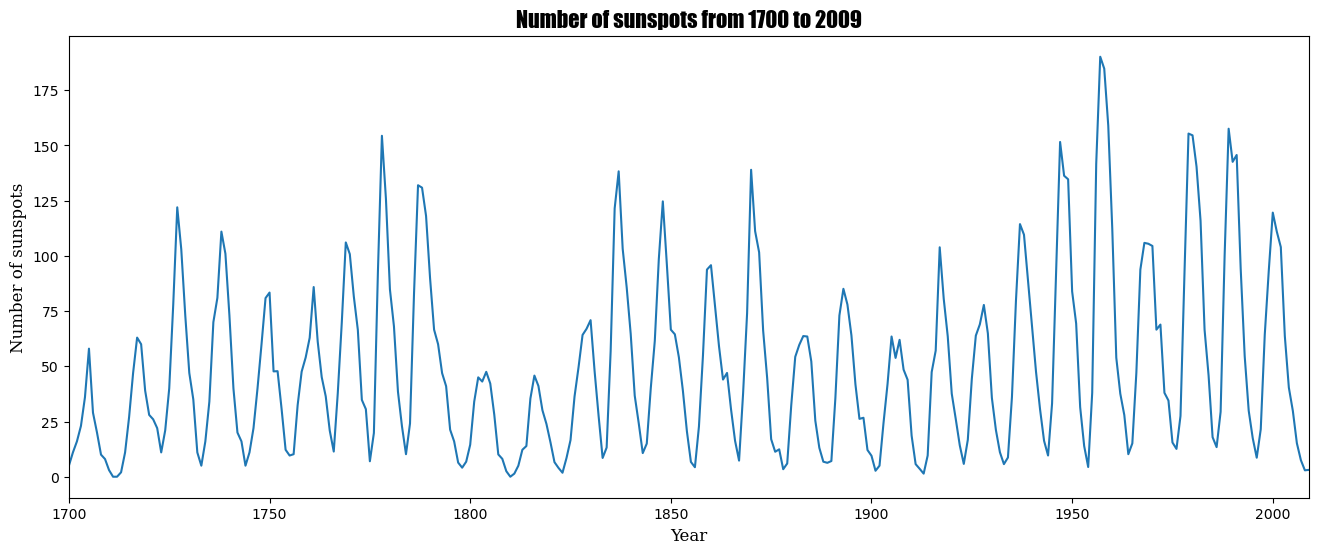

In [34]:
# test function
read_sunspots("data/yearly.txt")

8. ... are caused by lynxes!?? (3 points)
It has not been proven completely impossible that lynxes might have a significant impact on the number of sunspots. Explore the theory by plotting the amount of sunspots and lynxes each year in the same figure. The scales are unfortunately not directly compatible, so z-normalize (see task 3) the number of sunspots and lynxes before plotting.

Note: You can use this slightly more readable csv file for the sunspot data in case you didn't complete exercise 7.